## Attributes :
1. drugName : name of drug 2.condition : name of condition
2. review : patient review
3. rating : 10 star patient rating
4. date : date of review entry
5. usefulCount : number of users who found review useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
#plt.style.use('fivethirtyeight')
from textblob import TextBlob

In [2]:
df_train = pd.read_csv('E:\project\Drug Review\dataset\drugsComTrain_raw.csv')

In [3]:
df_test = pd.read_csv('E:\project\Drug Review\dataset\drugsComTest_raw.csv')

In [4]:
print("Shape of training dataset:", df_train.shape)
df_train.head()

Shape of training dataset: (161297, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print("Shape of testing dataset:", df_test.shape)
df_test.head()

Shape of testing dataset: (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [8]:
print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))
print("unique values count of Test : " ,len(set(df_test['uniqueID'].values)))

unique values count of train :  161297
unique values count of Test :  53766


In [9]:
print('Description of Train:','\n',df_train.rating.describe())
print('\n','Description of Test:','\n',df_test.rating.describe())

Description of Train: 
 count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

 Description of Test: 
 count    53766.000000
mean         6.976900
std          3.285207
min          1.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64


In [10]:
df_train.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [11]:
df_test.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### Observation :
* Missing values observed in condition, this maybe because people don't know their condition or maybe because of it's confidentiality/privacy.  


In [12]:
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

In [13]:
data = pd.concat([df_train, df_test])
print("Shape of dataset after combining both train & test:", data.shape)
data.head()

Shape of dataset after combining both train & test: (213869, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# EDA

In [14]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,213869.0,116076.924786,67016.705794,0.0,58122.0,115972.0,174018.0,232291.0
rating,213869.0,6.991149,3.275792,1.0,5.0,8.0,10.0,10.0
usefulCount,213869.0,28.094118,36.401377,0.0,6.0,16.0,36.0,1291.0


In [16]:
data.isnull().any()

uniqueID       False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [17]:
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [18]:
# How many drugs do we have?
Drug = len(data['drugName'].unique())
print('We number of Drugs are -',Drug )

We number of Drugs are - 3667


In [19]:
data['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [20]:
# What is the most popular drug?
# Top 10 Drugs (Most Popular)
data['drugName'].value_counts().nlargest(10)

Levonorgestrel                        4896
Etonogestrel                          4402
Ethinyl estradiol / norethindrone     3619
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2682
Ethinyl estradiol / levonorgestrel    2400
Phentermine                           2077
Sertraline                            1859
Escitalopram                          1739
Mirena                                1673
Name: drugName, dtype: int64

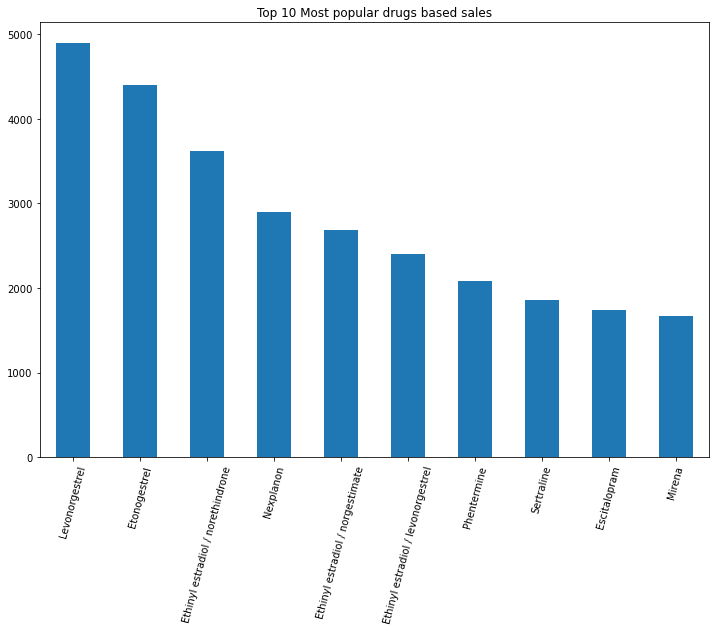

In [21]:
# Top 10 Drugs (Most Popular)
plt.figure(figsize=(12,8))
data['drugName'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most popular drugs based sales")
plt.xticks(rotation=75)
plt.show()

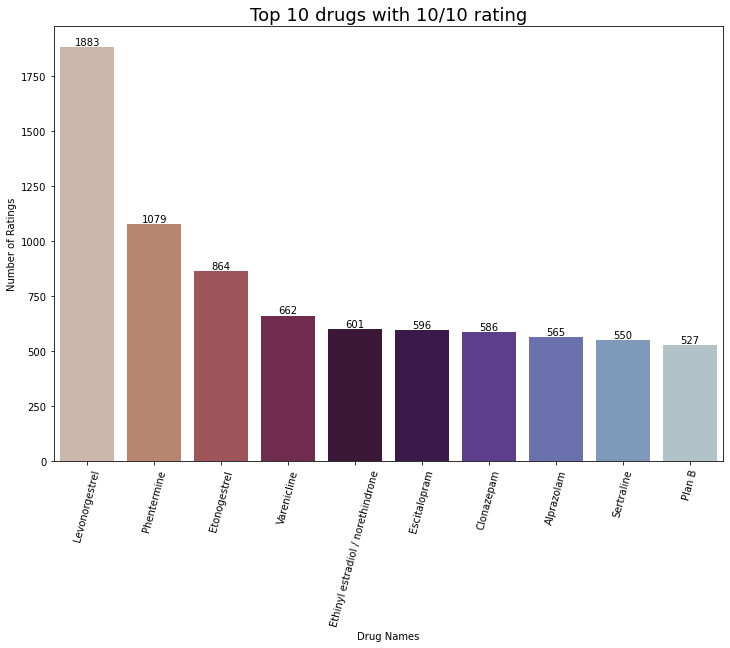

In [22]:
# Top 10 Drugs 
plt.figure(figsize=(12,8))
rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'twilight_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 10 drugs with 10/10 rating', fontsize=18)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.xticks(rotation=75)
plt.show()

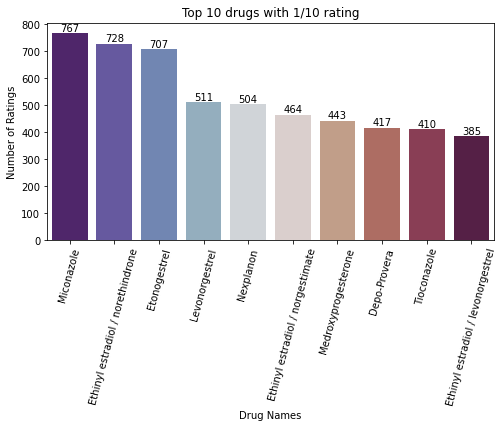

In [23]:
# Least 10 Drugs 
plt.figure(figsize=(8,4))
rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'twilight_shifted')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 10 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.xticks(rotation=75)
plt.show()

###### What are the description and groups/classification of drugs used?

In [24]:
df_train['review'][0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [25]:
drug_description = {"azole":"antifungal agents have added greatly to the therapeutic options for treatment of systemic fungal infections",
"caine":"anesthetic, reduce swelling, inflammation, pain and lameness.",
"cillin":"antibiotic, It is used to treat infections of the lungs (e.g., pneumonia), ear, nasal sinus, urinary tract, skin, and soft tissue.",
"mycin":"antibiotic used to treat various types of bacterial infections.",
"micin":"antibiotic used to prevent or treat a wide variety of bacterial infections",
"cycline":"It is an antibiotic that works by stopping the growth of bacteria(treats only bacterial infections).",
"oxacin":"antibiotic it is used to treat certain bacterial infections in many different parts of the body.",
"ceph":"antibiotic used to treat certain infections caused by bacteria such as pneumonia and other respiratory tract infections",
"cef":"(cephalosporins) It is an antibiotic medicine used to treat bacterial infections in your body",
"dine":"h2 blockers (anti-ulcers) medicine used in the treatment of Parkinson's disease and drug-induced abnormal movements.",
"done":"treat gastroesophageal reflux disease (Acid reflux) and peptic ulcer disease",
"ide":"oral hypoglycemics drugs primarily focus on type 2 diabetes mellitus.",
"lam":"anti-anxiety, it is a prescription medicine used to treat anxiety.",
"pam":"It is used to treat moderate to severe pain in conditions such as osteoarthritis and rheumatoid arthritis.",
"mide":"It is used to reduce pressure in the eyes. ",
"zide":"It is used to treat tuberculosis, an infectious disease that mainly affects the lungs",
"nium":"neuromuscular blocking agents it is used adjunctively to anesthesia to produce paralysis",
"olol":"It used to treat heart failure, cardiac arrhythmias, and hypertension",
"tidine":"It was used for indigestion, heartburn and acid reflux and to prevent and treat stomach ulcers.",
"tropin":"pituitary hormone it is used to treat inflammation (swelling, redness, etc) in the eyes.",
"zosin":"It s used to treat many different infections caused by bacteria, such as stomach infections, skin infections, pneumonia, and severe uterine infections.",
"ase":"It is used in the treatment of pain and inflammation.",
"plase":"thrombolytics medicines are approved for the emergency treatment of stroke and heart attack. ",
"azepam":"It's used to treat anxiety, muscle spasms and seizures or fits.",
"azine":"antibiotic used to treat various types of bacterial infections of the respiratory tract, ear, nose, throat, lungs, skin, and eye in adults and children.)",
"barbital":"It is used for anesthesia reasons, treating epilepsy and nonepileptic seizures, insomnia and other conditions. ",
"dipine":"used to treat high blood pressure (hypertension) and to prevent angina (heart-related chest pain).",
"lol":"beta blocker, used to treat: angina – chest pain caused by narrowing of the arteries supplying the heart. heart failure – failure of the heart to pump enough blood around the body. atrial fibrillation – irregular heartbeat.",
"zolam":"benzodiazepines, It is used to treat anxiety.",
"pril":"ace inhibitor, It reduces stress on the heart and relaxes the blood vessels.",
"artan":"arb blocker, it is used to treat symptoms of Parkinson's disease (stiffness, tremors, spasms, poor muscle control).",
"statins":"lipid-lowering drugs, Statins are effective at lowering cholesterol and protecting against a heart attack and stroke",
"parin":"It is an anticoagulant used to prevent and treat harmful blood clots.",
"sone":"It is used to treat conditions like allergic conditions, anaphylaxis, asthma, rheumatoid arthritis and inflammatory skin diseases."}

In [26]:
def Description(drugname):
    for i in drug_description.keys():
        if drugname.endswith(i):
            return drug_description[i]

In [27]:
Description('zolam')

'anti-anxiety, it is a prescription medicine used to treat anxiety.'

In [28]:
drug_use = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [29]:
def classify_drug(drugname):
    for suffix in drug_use.keys():
        if drugname.endswith(suffix):
            return drug_use[suffix]

In [30]:
classify_drug('sone')

'corticosteroid (prednisone)'

In [31]:
# data['drug_class'] = data['drugName'].apply(classify_drug)

In [32]:
# data[['drugName','drug_class']].head()

######  How many Groups of Drugs By Class

In [33]:
# data['drug_class'].unique().tolist()

######  How many Groups of Drugs By Class

In [34]:
# grp_drugs = len(data['drug_class'].unique().tolist())
# print('Groups of Drugs by Class - ',grp_drugs)

In [35]:
# data['drug_class'].value_counts()

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# # Which class of drugs the most commonly used 

# plt.figure(figsize=(20,10))
# most_common = sns.countplot(data['drug_class'], palette = 'twilight_r')

# for i in most_common.containers:
#     most_common.bar_label(i)
    
# most_common.set_title('Count of drug')
# most_common.set_ylabel("Count")
# plt.xticks(rotation=75)
# plt.show()

#####  Top 5 used drug classes are:

* antifungal 
* opiod analgesics
* oral hypoglycemics
* antibiotic        
* anti-anxiety      

###  most popular drugs

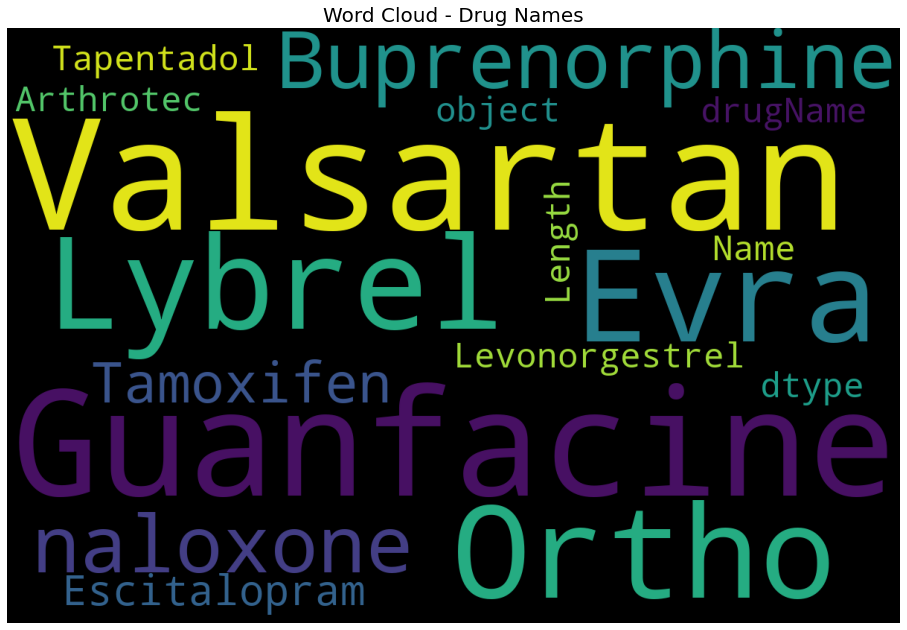

In [38]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (16, 12)
plt.title('Word Cloud - Drug Names', fontsize = 20)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

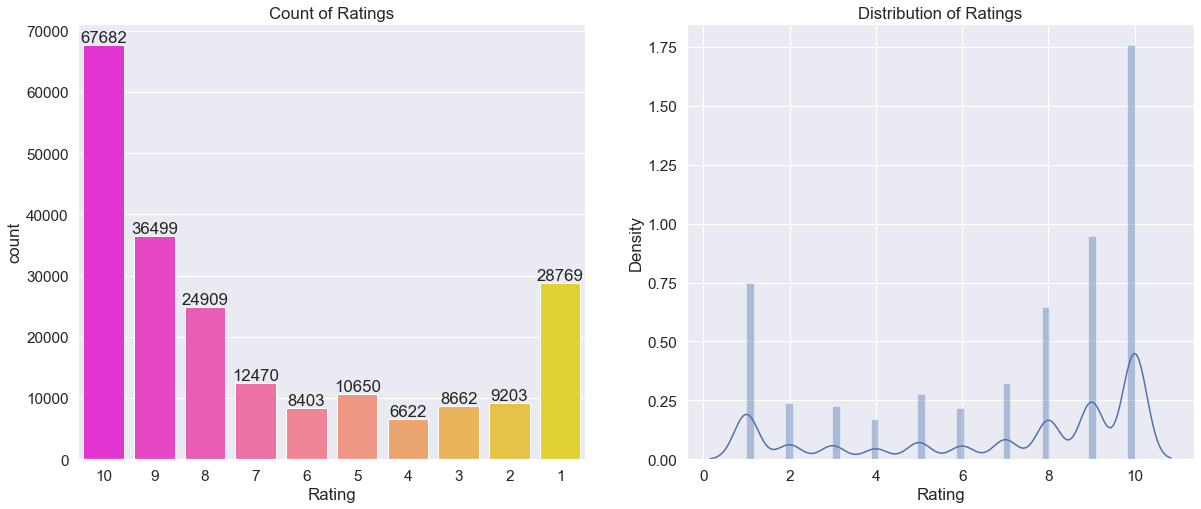

In [39]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.show()

In [40]:
# data.groupby('drug_class').size()

In [41]:
# Distribution of Drugs Per Drug Group based on size
# drug_groups = data.groupby('drug_class').size()

In [42]:
# drug_groups = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

In [43]:
# drug_groups.sort_values(by=['counts'],ascending=False)

In [44]:
# plt.figure(figsize=(20,10))
# drug_group_size = sns.barplot(data=drug_groups,x='drug_class',y='counts', palette = 'viridis')

# for i in drug_group_size.containers:
#     drug_group_size.bar_label(i)
    
# drug_group_size.set_title('Heighest Count of Drugs in a Drug Class', fontsize=20)
# drug_group_size.set_xlabel("count")
# drug_group_size.set_xlabel("Drug class")
# plt.xticks(rotation=75)
# plt.show()

#####   How many Conditions are suffered by patients?

In [45]:
len(data['condition'].unique().tolist())

916

In [46]:
data['condition'].value_counts()

Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: condition, Length: 916, dtype: int64

In [47]:
common_condition = data['condition'].value_counts().nlargest(10)

In [48]:
# common_condition = pd.DataFrame({'drug_class':common_condition.index,'counts':common_condition.values})

In [49]:
# #### Most commonest Conditions
# plt.figure(figsize=(20,10))

# sns_1 = sns.barplot(data=common_condition,x='drug_class',y='counts', palette = 'winter_r')

# for i in sns_1.containers:
#     sns_1.bar_label(i)
    
# sns_1.set_title('Most suffered Conditions', fontsize=20)
# sns_1.set_xlabel("Rating")
# sns_1.set_xlabel("Different Conditions")
# plt.xticks(rotation=90)
# plt.show()

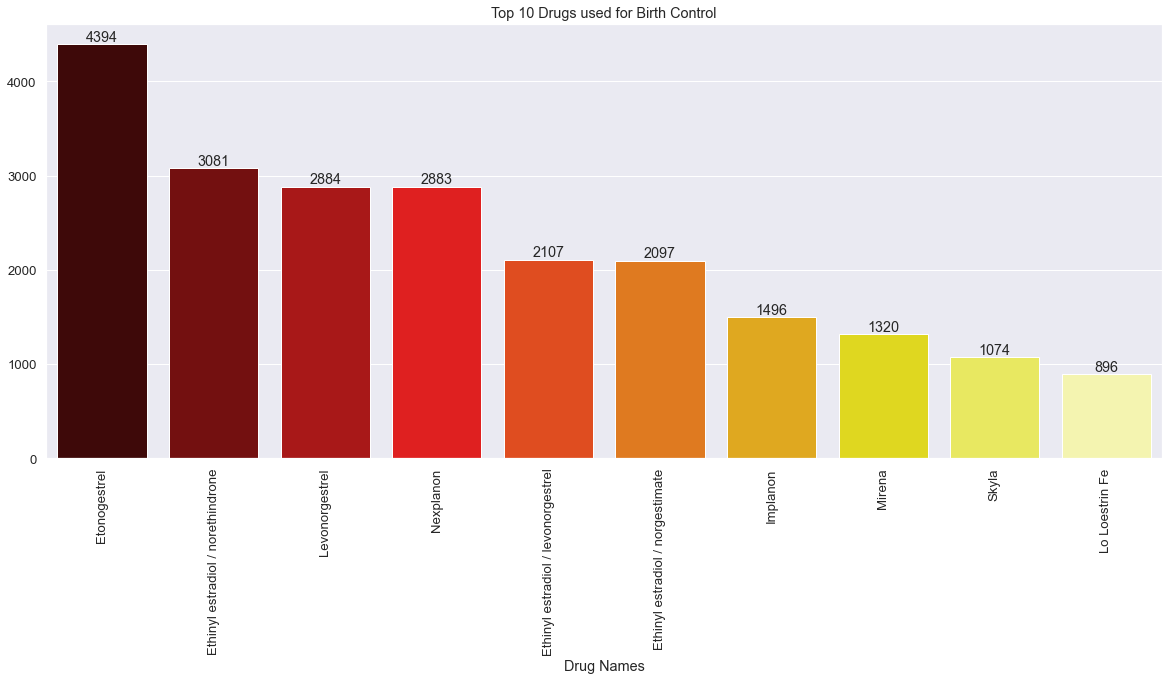

In [50]:
Drugs_for_BC = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = Drugs_for_BC.index, y = Drugs_for_BC.values, palette = 'hot')

for i in sns_.containers:
    sns_.bar_label(i,)
    
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

###  Rare conditions

In [51]:
data['condition'].value_counts().nsmallest(10)

Gastric Cance                                   1
95</span> users found this comment helpful.     1
121</span> users found this comment helpful.    1
61</span> users found this comment helpful.     1
Q Feve                                          1
Diagnostic Bronchograms                         1
Asystole                                        1
Neoplastic Diseases                             1
Short Stature                                   1
Hypercalcemia                                   1
Name: condition, dtype: int64

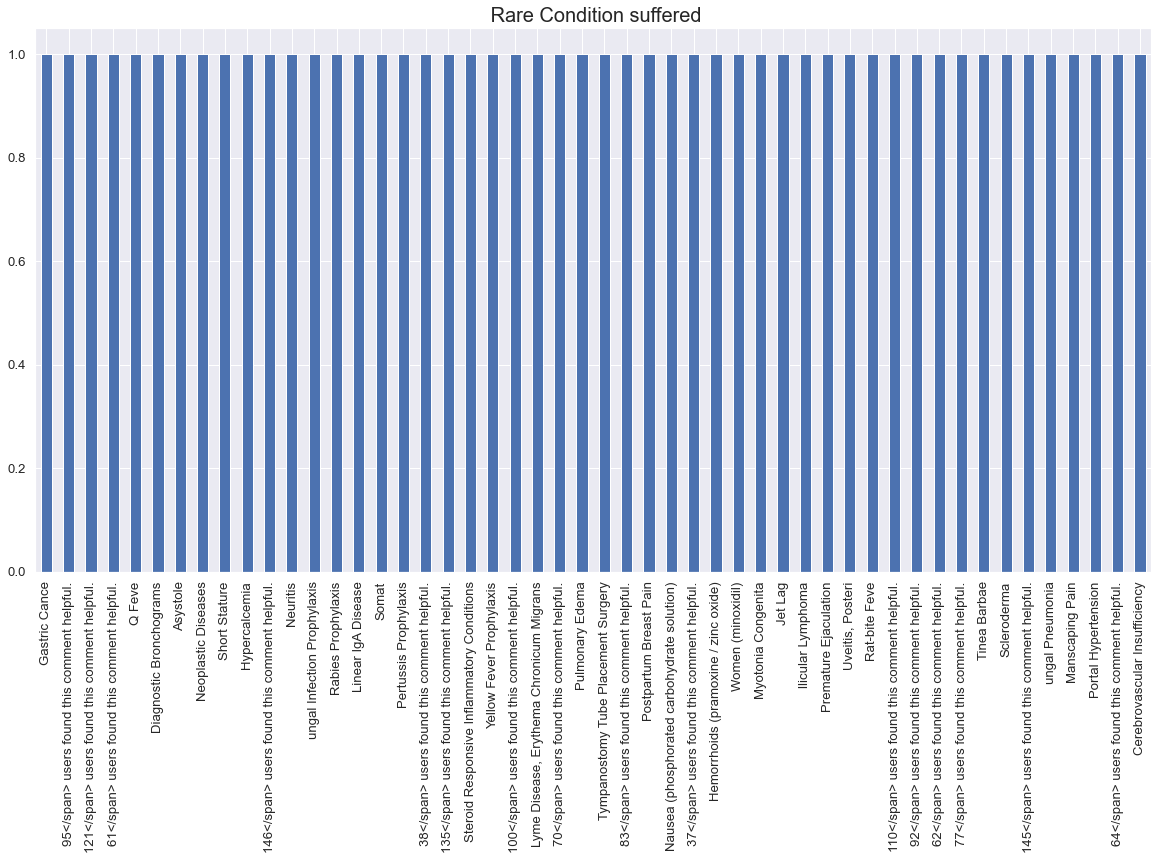

In [52]:
#### 50 Rare Conditions
data['condition'].value_counts().nsmallest(50).plot(kind='bar',figsize=(20,10))
plt.title(' Rare Condition suffered', fontsize=20)
plt.show()

### How many type of Drugs per condition 

In [53]:
drug_per_cond = data.groupby('condition')['drugName'].nunique().nlargest(10)

In [54]:
# drug_per_cond = pd.DataFrame({'drug_class': drug_per_cond.index,'count':drug_per_cond.values})

In [55]:
# plt.figure(figsize=(20,12))
# per_condtional_drug = sns.barplot(data= drug_per_cond, x= 'drug_class', y='count',palette='Blues_r')

# for i in per_condtional_drug.containers:
#     per_condtional_drug.bar_label(i)
    
# per_condtional_drug.set_title('Type of Drugs per condition', fontsize=20)
# per_condtional_drug.set_xlabel("Drug Class")
# per_condtional_drug.set_ylabel("Count")
# plt.xticks(rotation= 90)
# plt.show()

###  Distribution of Rating 

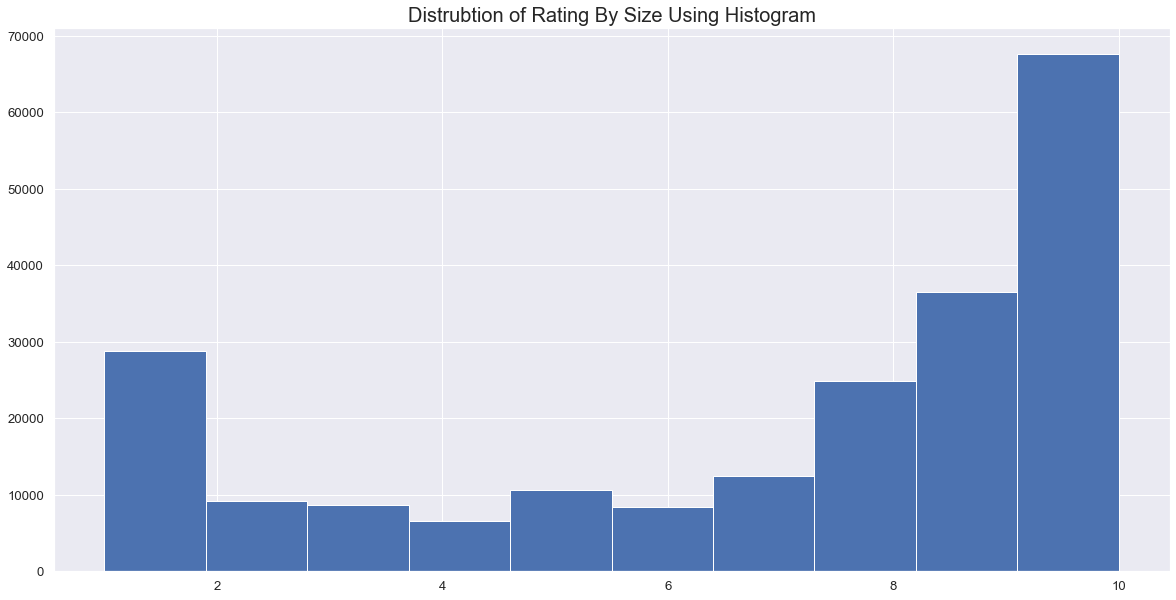

In [56]:
plt.figure(figsize=(20,10))
data['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

####  Average Rating of Drugs

In [57]:
avg_rating = (data['rating'].groupby(data['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.414286
Abacavir / lamivudine                   10.000000
Abacavir / lamivudine / zidovudine       9.000000
                                          ...    
ZzzQuil                                  2.000000
depo-subQ provera 104                    5.500000
ella                                     7.183099
femhrt                                   6.500000
pHisoHex                                10.000000
Name: rating, Length: 3667, dtype: float64

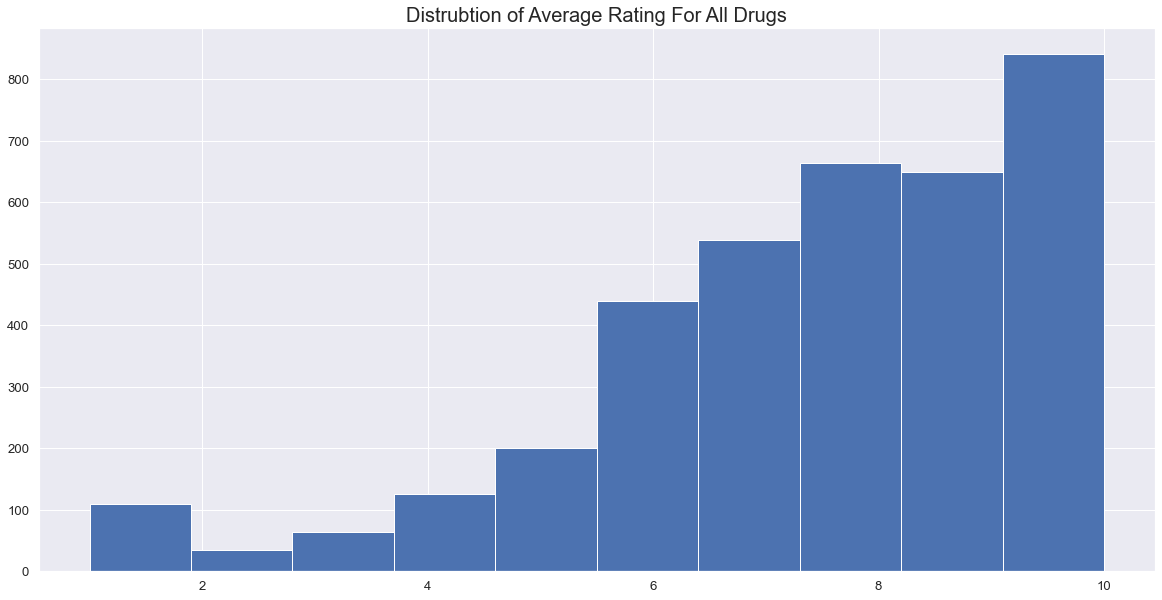

In [58]:
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20,)
plt.show()

In [59]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

In [60]:
data['year']= data['date'].dt.year

In [61]:
data['month'] = data['date'].dt.month

In [62]:
data['day'] = data['date'].dt.day

###  Analysing yearly rating

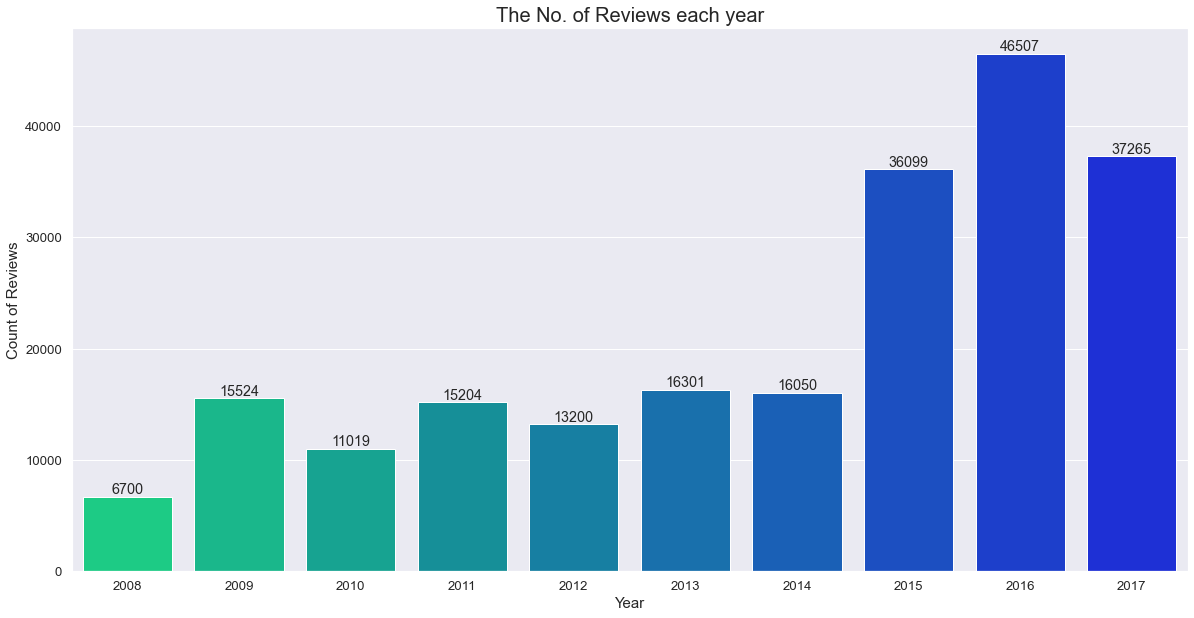

In [63]:
plt.figure(figsize=(20,10))
yearly_rating=sns.countplot(data['year'], palette ='winter_r')

for i in yearly_rating.containers:
    yearly_rating.bar_label(i)
    
plt.title('The No. of Reviews each year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

### Analysing Monthly rating 

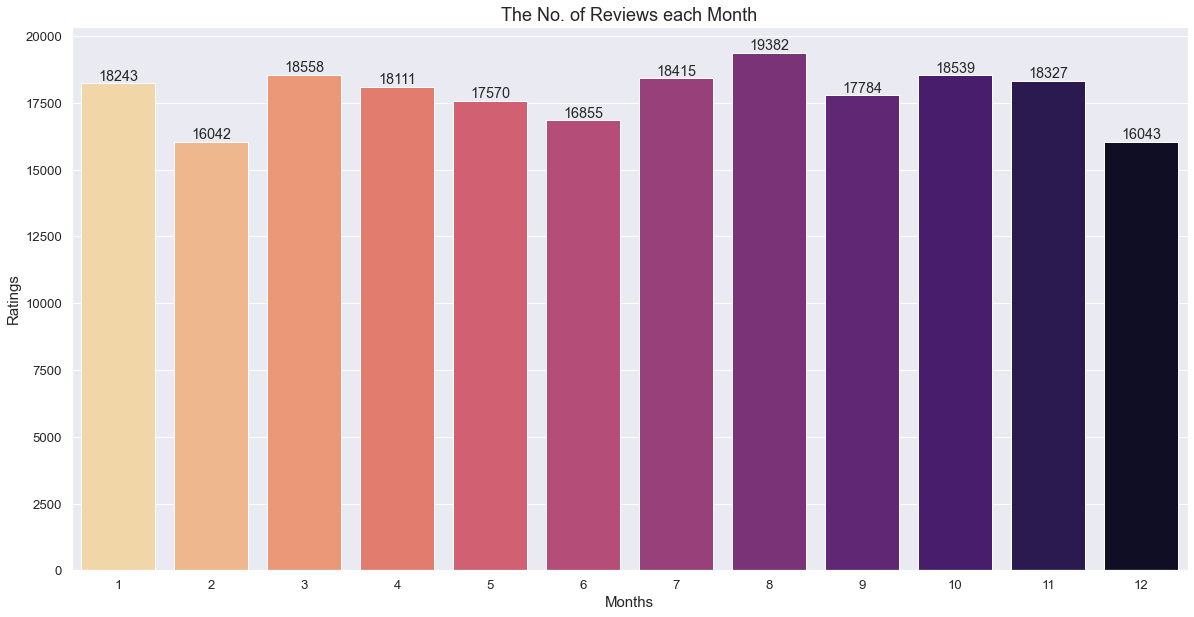

In [64]:
plt.figure(figsize=(20,10))
montly_rating = sns.countplot(data['month'],palette='magma_r')
for i in montly_rating.containers:
    montly_rating.bar_label(i)
plt.title('The No. of Reviews each Month', fontsize = 18)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

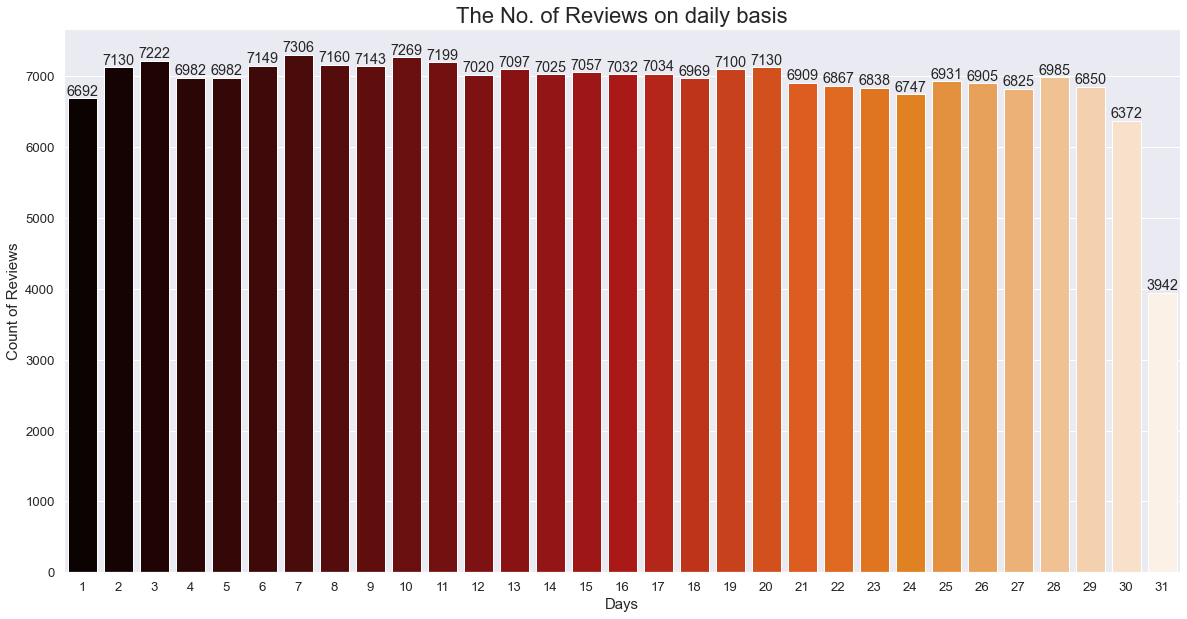

In [65]:
plt.figure(figsize=(20,10))
daily_rating =sns.countplot(data['day'], palette ='gist_heat')

for i in daily_rating.containers:
    daily_rating.bar_label(i)
    
plt.title('The No. of Reviews on daily basis', fontsize = 22)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [66]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27


In [67]:
from textblob import TextBlob

In [68]:
data['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [69]:
data['review'].info()

<class 'pandas.core.series.Series'>
Int64Index: 213869 entries, 0 to 53765
Series name: review
Non-Null Count   Dtype 
--------------   ----- 
213869 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [70]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [71]:
# Sentiment Score for Review
data['sentiment'] = data['review'].apply(get_sentiment)

In [72]:
data['sentiment'].head()

0    0.000000
1    0.168333
2    0.067210
3    0.179545
4    0.194444
Name: sentiment, dtype: float64

In [73]:
# Sentiment Labels for Review
data['sentiment_label'] = data['review'].apply(get_sentiment_label)

In [143]:
data[['review','sentiment','sentiment_label']].head()

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive


In [75]:
data['sentiment_label'].value_counts()

positive    133745
negative     70872
neutral       9252
Name: sentiment_label, dtype: int64

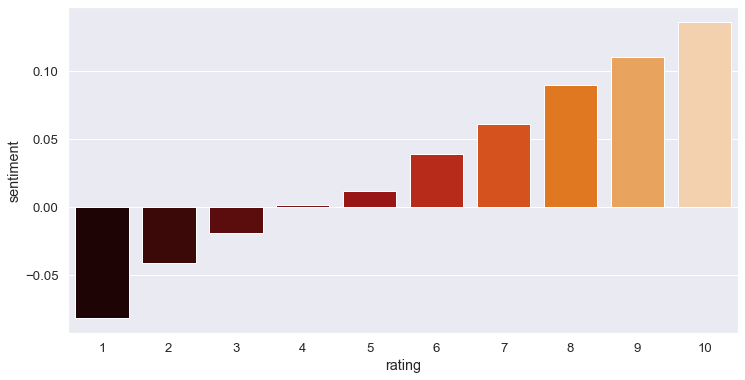

In [76]:
#### Correlation Between Our sentiment and rating
plt.figure(figsize=(12,6))
sns.barplot(data=data,x='rating',y='sentiment', ci = False,  palette ='gist_heat')
plt.show()

In [77]:
# Genuine Good  Rating Per Review
good_review =  len(data[(data['rating'] >= 6) & (data['sentiment_label'] == 'positive')])
print('According to Sentiment and Rating the number of Good Ratings are -', good_review)

According to Sentiment and Rating the number of Good Ratings are - 107298


In [78]:
# Genuine Bad  Rating Per Review
bad_review = len(data[(data['rating'] <= 4) & (data['sentiment_label'] == 'negative')])
print('According to Sentiment and Rating the number of Good Ratings are -', bad_review)

According to Sentiment and Rating the number of Good Ratings are - 29335


In [79]:
drug_usefulcount = data.groupby('drugName')['usefulCount'].nunique().nlargest(10)

In [80]:
drug_usefulcount = pd.DataFrame({'drugName': drug_usefulcount.index, 'counts': drug_usefulcount.values})

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   uniqueID         213869 non-null  int64         
 1   drugName         213869 non-null  object        
 2   condition        213869 non-null  object        
 3   review           213869 non-null  object        
 4   rating           213869 non-null  int64         
 5   date             213869 non-null  datetime64[ns]
 6   usefulCount      213869 non-null  int64         
 7   year             213869 non-null  int64         
 8   month            213869 non-null  int64         
 9   day              213869 non-null  int64         
 10  sentiment        213869 non-null  float64       
 11  sentiment_label  213869 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 21.2+ MB


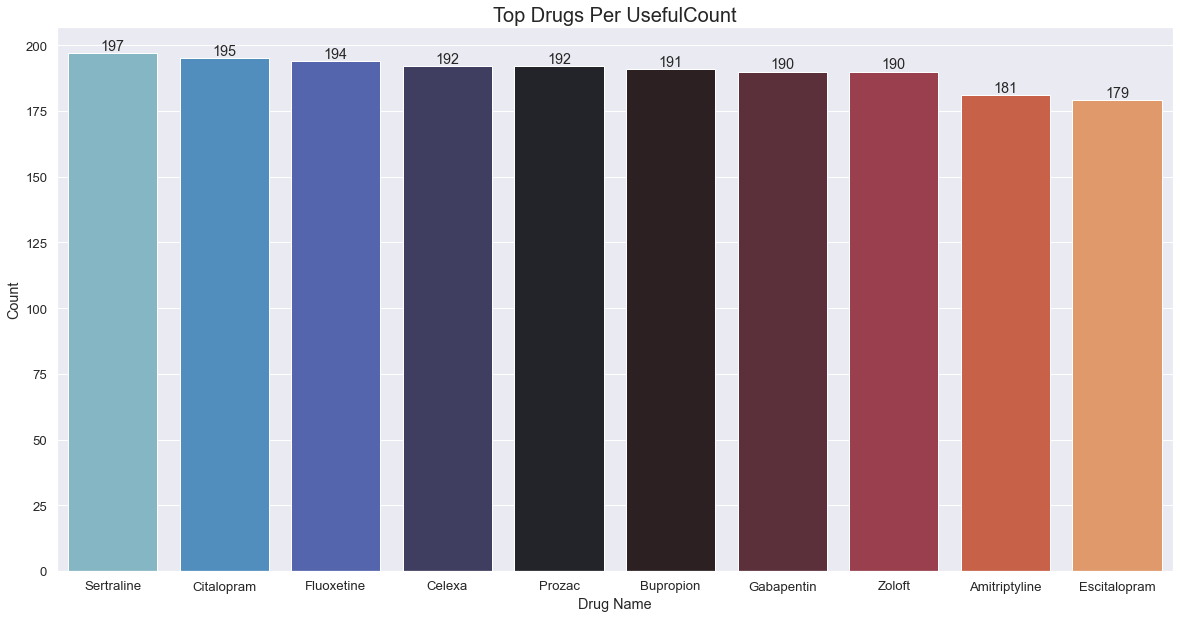

In [82]:
plt.figure(figsize=(20,10))
top_drug_per_usefulcount = sns.barplot(data= drug_usefulcount, x= 'drugName', y='counts',palette='icefire')

for i in top_drug_per_usefulcount.containers:
    top_drug_per_usefulcount.bar_label(i)
    
top_drug_per_usefulcount.set_title('Top Drugs Per UsefulCount', fontsize=20)
top_drug_per_usefulcount.set_xlabel("Drug Name")
top_drug_per_usefulcount.set_ylabel("Count")
plt.show()

####  sertraline, citalopram and Fluoxetine are the top 3 drugs which are most useful for treating people

## #Top drug class per usefulcount

In [83]:
# top_drugclass_per_usefulcount = data.groupby('drug_class')['usefulCount'].nunique().nlargest(10)
# top_drugclass_per_usefulcount 

In [84]:
# top_drugclass_per_usefulcount = pd.DataFrame({'drug_class':top_drugclass_per_usefulcount.index, 
#                                               'counts':top_drugclass_per_usefulcount.values})

In [85]:
# plt.figure(figsize=(20,10))
# plot_drugclass_per_usefulcount = sns.barplot(data=top_drugclass_per_usefulcount, x='drug_class',y='counts',palette='gist_heat')

# for i in plot_drugclass_per_usefulcount.containers:
#     plot_drugclass_per_usefulcount.bar_label(i)

# plot_drugclass_per_usefulcount.set_title('Top Drug Class per UsefulCount', fontsize=20)
# plot_drugclass_per_usefulcount.set_xlabel("Drug Class")
# plot_drugclass_per_usefulcount.set_ylabel("Count")
# plt.setp(plot_drugclass_per_usefulcount.get_xticklabels(), rotation=90)
# plt.show()

In [86]:
# # Top Drugs Class Per UsefulCount
# least_drug_class_usefulcount = data.groupby('drug_class')['usefulCount'].nunique().nsmallest(10)

In [87]:
# least_drug_class_usefulcount = pd.DataFrame({'drug_class':least_drug_class_usefulcount.index,'counts':least_drug_class_usefulcount.values})

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   uniqueID         213869 non-null  int64         
 1   drugName         213869 non-null  object        
 2   condition        213869 non-null  object        
 3   review           213869 non-null  object        
 4   rating           213869 non-null  int64         
 5   date             213869 non-null  datetime64[ns]
 6   usefulCount      213869 non-null  int64         
 7   year             213869 non-null  int64         
 8   month            213869 non-null  int64         
 9   day              213869 non-null  int64         
 10  sentiment        213869 non-null  float64       
 11  sentiment_label  213869 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 21.2+ MB


In [89]:
# plt.figure(figsize=(20,10))

# plt_leastdrugclass_usefulcount = sns.barplot(data=least_drug_class_usefulcount,x='drug_class',y='counts', palette = 'inferno')

# for i in plt_leastdrugclass_usefulcount.containers:
#     plt_leastdrugclass_usefulcount.bar_label(i)
    
# plt_leastdrugclass_usefulcount.set_title('Least useful Drug Class', fontsize=20)
# plt_leastdrugclass_usefulcount.set_xlabel("Drug Class")
# plt_leastdrugclass_usefulcount.set_ylabel("Count")
# plt.setp(plt_leastdrugclass_usefulcount.get_xticklabels(), rotation=90)
# plt.show()

####  Anticoagulant, barbiturate and pitutary harmone is the Least used Drug Class for perscribed for peoples

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

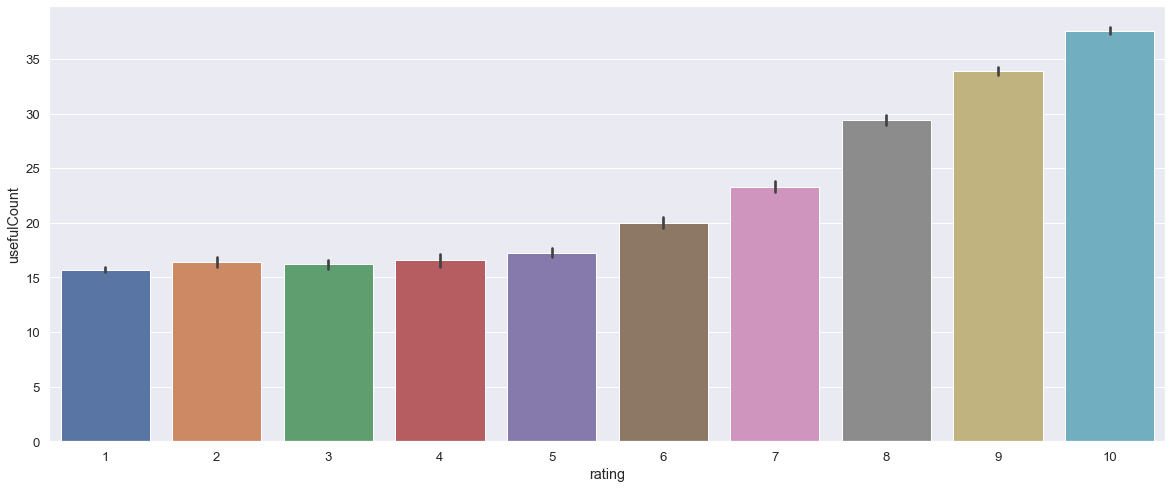

In [90]:
### Correlation between Rating and Usefulcount
sns.barplot(data=data,x='rating',y='usefulCount')

In [91]:
# let's make a new column named "review sentiment"

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    160613
0.0     53256
Name: Review_Sentiment, dtype: int64

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   uniqueID          213869 non-null  int64         
 1   drugName          213869 non-null  object        
 2   condition         213869 non-null  object        
 3   review            213869 non-null  object        
 4   rating            213869 non-null  int64         
 5   date              213869 non-null  datetime64[ns]
 6   usefulCount       213869 non-null  int64         
 7   year              213869 non-null  int64         
 8   month             213869 non-null  int64         
 9   day               213869 non-null  int64         
 10  sentiment         213869 non-null  float64       
 11  sentiment_label   213869 non-null  object        
 12  Review_Sentiment  213869 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory

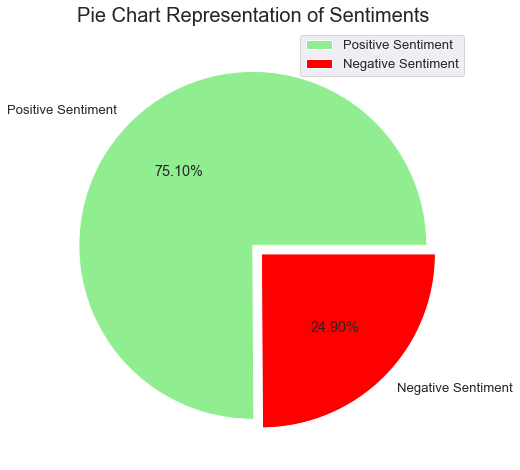

In [93]:
size = [160613, 53256]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.07]

plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 20)
plt.legend()
plt.show()

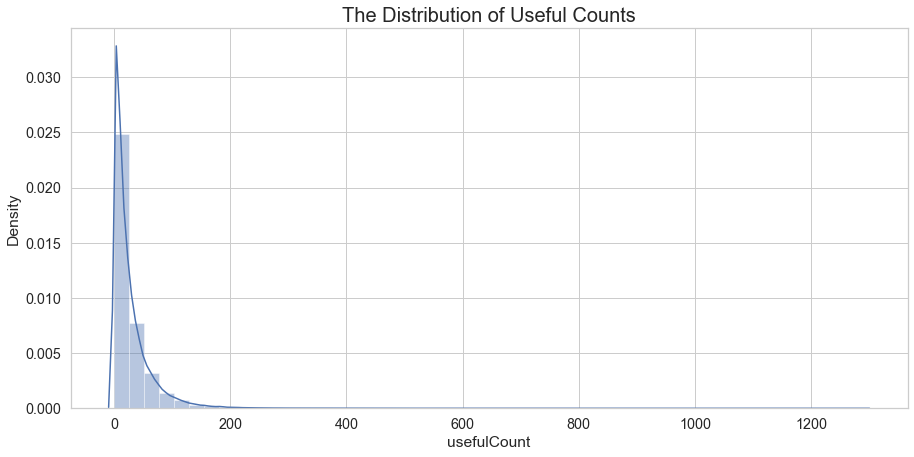

In [94]:
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [15, 7]
sns.distplot(data['usefulCount'].dropna())
plt.title('The Distribution of Useful Counts', fontsize = 20)
plt.show()

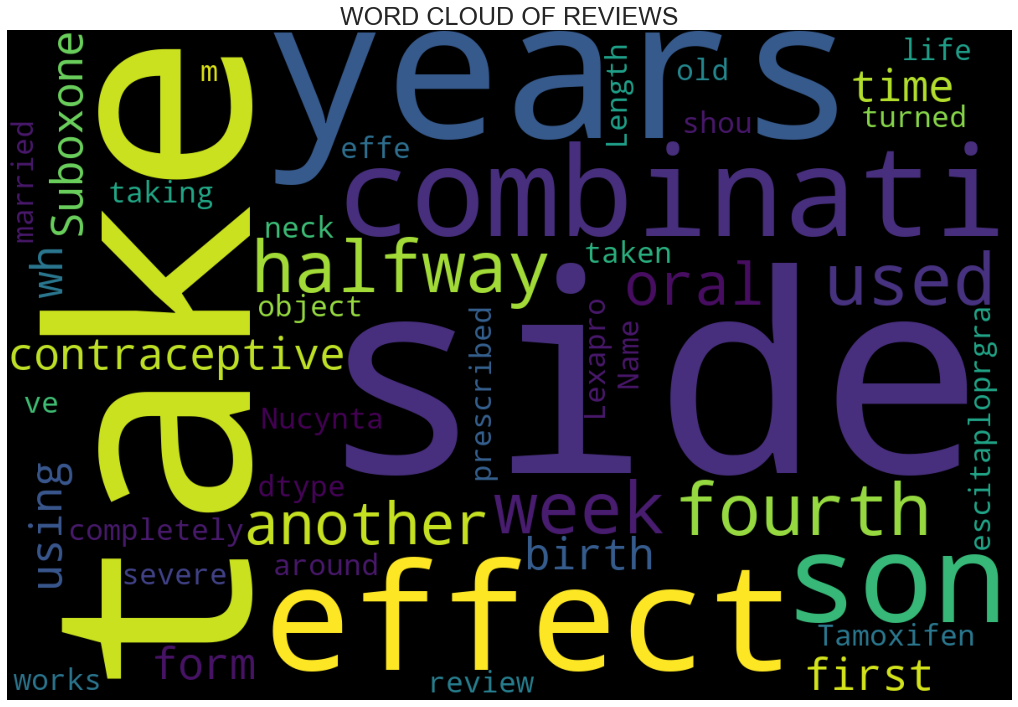

In [95]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (18, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 53765
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   uniqueID          213869 non-null  int64         
 1   drugName          213869 non-null  object        
 2   condition         213869 non-null  object        
 3   review            213869 non-null  object        
 4   rating            213869 non-null  int64         
 5   date              213869 non-null  datetime64[ns]
 6   usefulCount       213869 non-null  int64         
 7   year              213869 non-null  int64         
 8   month             213869 non-null  int64         
 9   day               213869 non-null  int64         
 10  sentiment         213869 non-null  float64       
 11  sentiment_label   213869 non-null  object        
 12  Review_Sentiment  213869 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory

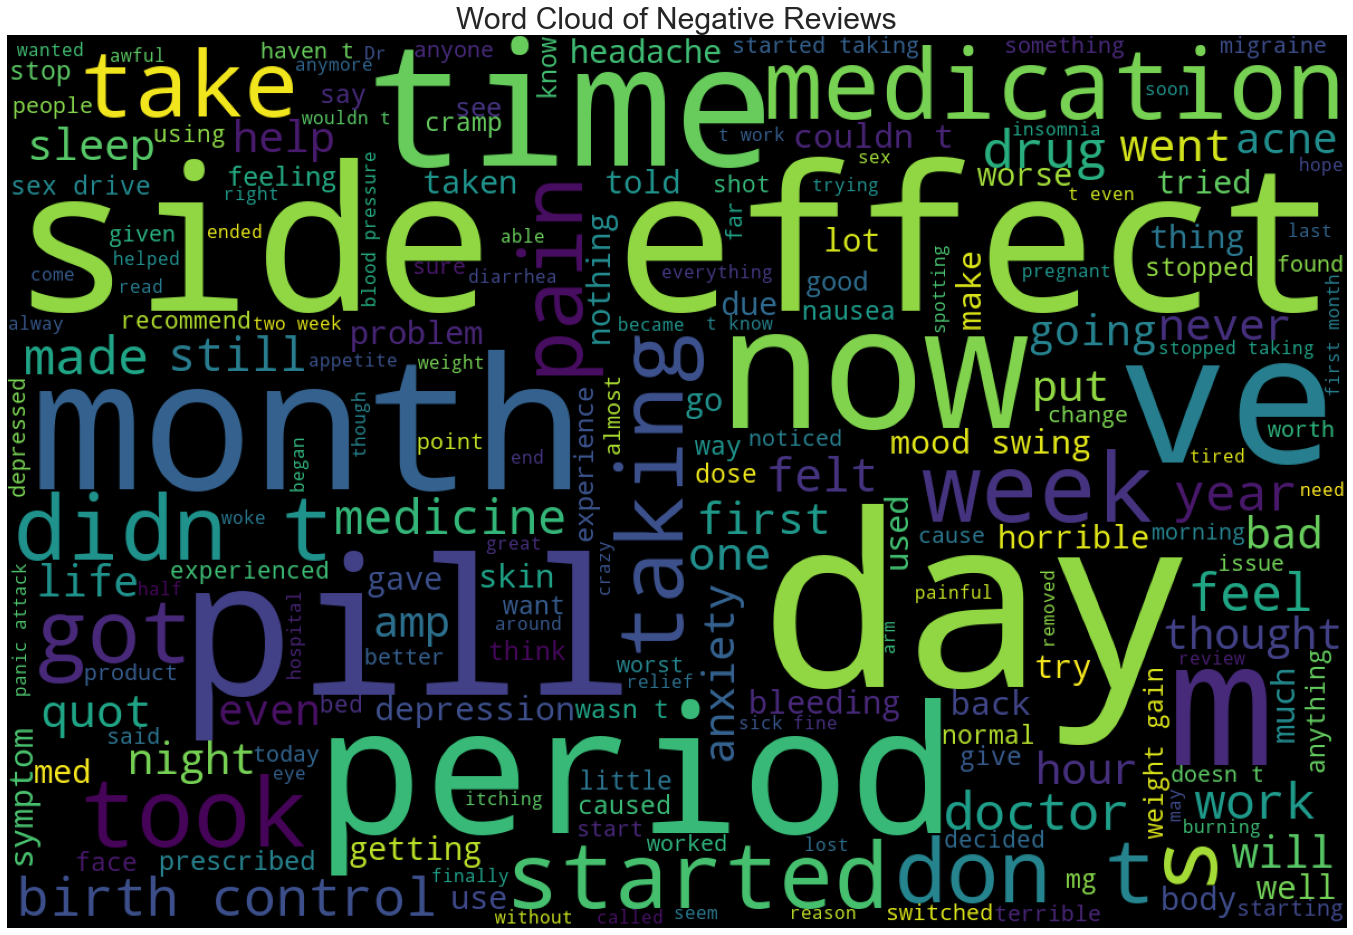

In [97]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (24, 20)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

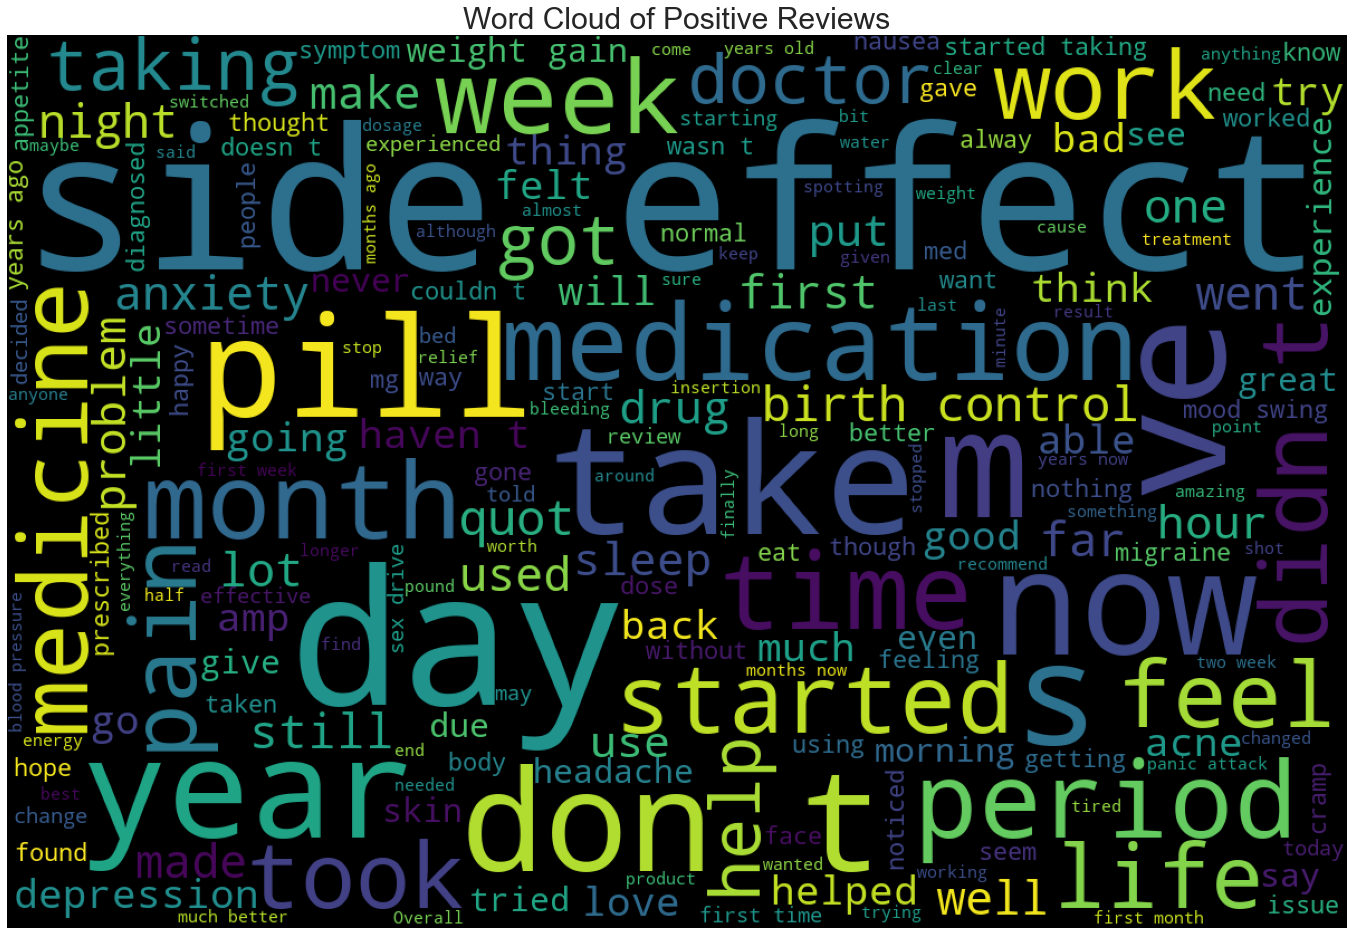

In [98]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])



stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (24, 20)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [144]:
data.review

0        "It has no side effect, I take it in combinati...
1        "My son is halfway through his fourth week of ...
2        "I used to take another oral contraceptive, wh...
3        "This is my first time using any form of birth...
4        "Suboxone has completely turned my life around...
                               ...                        
53761    "I have taken Tamoxifen for 5 years. Side effe...
53762    "I&#039;ve been taking Lexapro (escitaploprgra...
53763    "I&#039;m married, 34 years old and I have no ...
53764    "I was prescribed Nucynta for severe neck/shou...
53765                                        "It works!!!"
Name: review, Length: 213869, dtype: object

In [99]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [100]:
data.review_clean

0        it has no side effect i take it in combination...
1        my son is halfway through his fourth week of i...
2        i used to take another oral contraceptive whic...
3        this is my first time using any form of birth ...
4        suboxone has completely turned my life around ...
                               ...                        
53761    i have taken tamoxifen for 5 years side effect...
53762    ive been taking lexapro escitaploprgram since ...
53763    im married 34 years old and i have no kids tak...
53764    i was prescribed nucynta for severe neck shoul...
53765                                             it works
Name: review_clean, Length: 213869, dtype: object

In [102]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [103]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [104]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,sentiment,sentiment_label,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,0.000000,neutral,1.0,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,0.168333,positive,1.0,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.067210,positive,1.0,use take anoth oral contracept 21 pill cycl ha...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,0.179545,positive,1.0,first time use form birth control im glad went...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,0.194444,positive,1.0,suboxon complet turn life around feel healthie...


In [146]:
data[['review','review_clean']].head()

,review,review_clean
0,"""It has no side effect, I take it in combinati...",side effect take combin bystol 5 mg fish oil
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv becam concern ...
2,"""I used to take another oral contraceptive, wh...",use take anoth oral contracept 21 pill cycl ha...
3,"""This is my first time using any form of birth...",first time use form birth control im glad went...
4,"""Suboxone has completely turned my life around...",suboxon complet turn life around feel healthie...


In [105]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

data['sentiment'] = sentiment(data['review'])
data['sentiment_clean'] = sentiment(data['review_clean'])

In [106]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean_ss'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [107]:
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [149]:
data[['review','sentiment']].head()

,review,sentiment
0,"""It has no side effect, I take it in combinati...",0.000000
1,"""My son is halfway through his fourth week of ...",0.168333
2,"""I used to take another oral contraceptive, wh...",0.067210
3,"""This is my first time using any form of birth...",0.179545
4,"""Suboxone has completely turned my life around...",0.194444


In [109]:
data.sentiment_clean

0        0.000000
1        0.114583
2        0.105000
3        0.300000
4        0.147037
           ...   
53761   -0.078571
53762    0.106238
53763    0.069949
53764    0.000000
53765    0.000000
Name: sentiment_clean, Length: 213869, dtype: float64

In [110]:
data.sentiment_clean_ss

0        0.000000
1        0.168333
2        0.067210
3        0.179545
4        0.194444
           ...   
53761    0.029762
53762    0.105977
53763   -0.075956
53764    0.000000
53765    0.000000
Name: sentiment_clean_ss, Length: 213869, dtype: float64

In [111]:
data = data.dropna(how="any", axis=0)

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

### Feature Selection

In [112]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

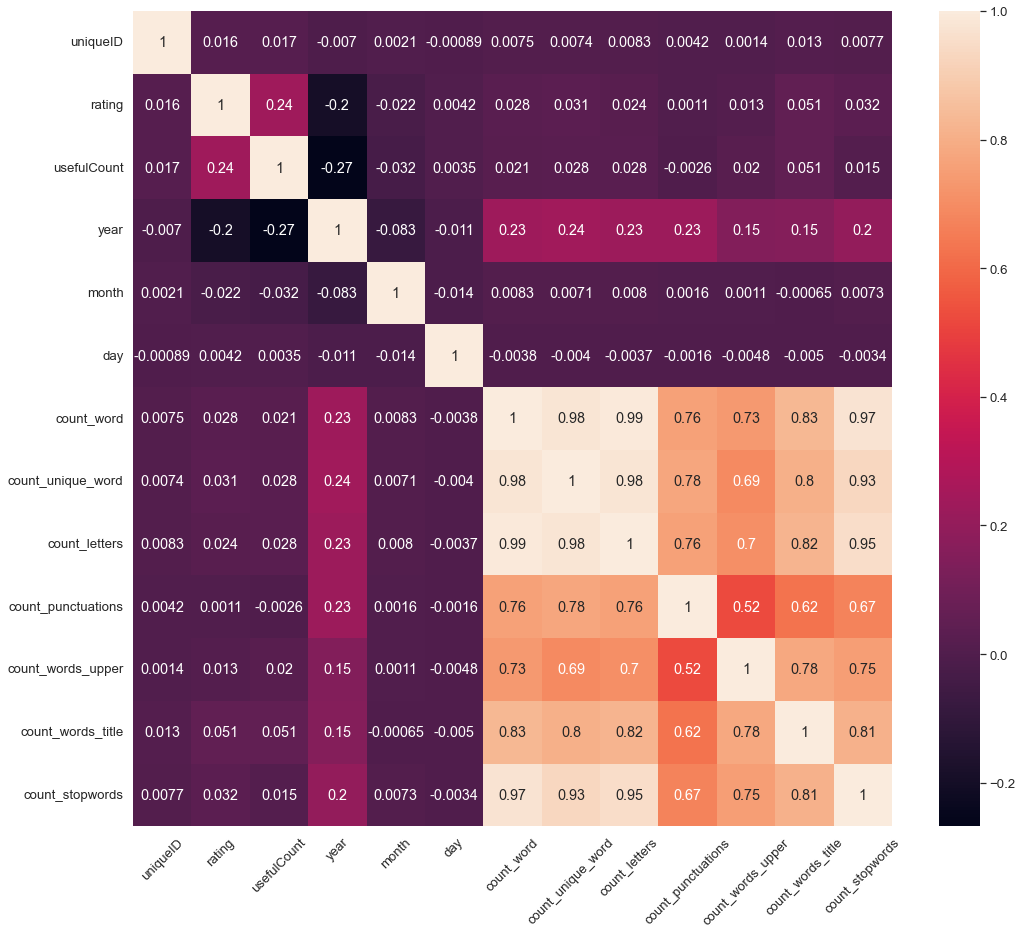

In [113]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.setp(sns_.get_xticklabels(), rotation = 45)
plt.show()

###  Model training 

In [114]:
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [115]:
features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

In [152]:
features.dropna(inplace=True)

In [153]:
features.isnull().sum()

condition             0
usefulCount           0
sentiment             0
day                   0
month                 0
year                  0
sentiment_clean_ss    0
count_word            0
count_unique_word     0
count_letters         0
count_punctuations    0
count_words_upper     0
count_words_title     0
count_stopwords       0
mean_word_len         0
dtype: int64

In [154]:
target.isnull().sum()

0

In [156]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
# print ("The Train set size ", X_train.shape)
# print ("The Test set size ", X_test.shape)

In [ ]:
# clf = LGBMClassifier(
#         n_estimators=10000,
#         learning_rate=0.10,
#         num_leaves=30,
#         subsample=.9,
#         max_depth=7,
#         reg_alpha=.1,
#         reg_lambda=.1,
#         min_split_gain=.01,
#         min_child_weight=2,
#         silent=-1,
#         verbose=-1,
#         )
# model = clf.fit(X_train, y_train)

# # Predictions
# predictions = model.predict(X_test)
# print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
# print ("The confusion Matrix is ")
# confusion_matrix(y_test, predictions)

In [ ]:
# # Feature Importance Plot using LGBM
# plt.rcParams['figure.figsize'] = [15, 9]
# sns.set(style = 'darkgrid', font_scale = 1.2)
# plot_importance(model)
# plt.show()

In [116]:
data.Review_Sentiment

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
53761    1.0
53762    1.0
53763    1.0
53764    0.0
53765    1.0
Name: Review_Sentiment, Length: 213869, dtype: float64

Text(0.5, 1.0, 'Sentiment')

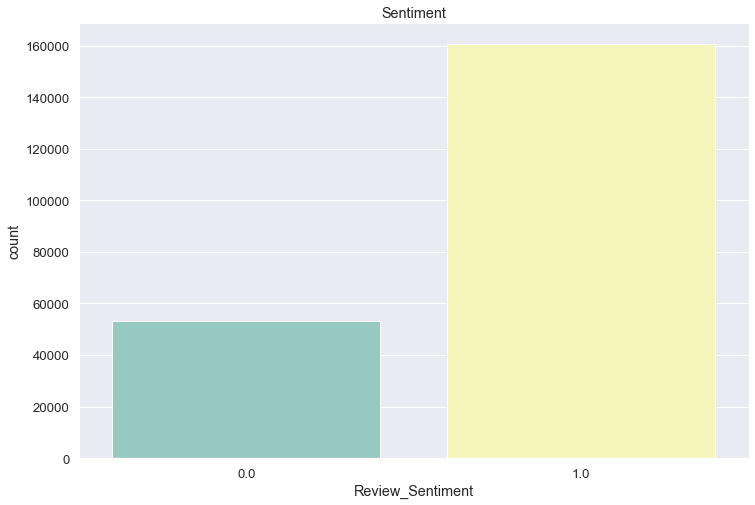

In [119]:
plt.rcParams['figure.figsize'] = [12,8]
sns.countplot(data['Review_Sentiment'], palette="Set3")
plt.title('Sentiment')

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [122]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
# Prepare data
y = data['Review_Sentiment'].values
X = data['sentiment_clean'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [141]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [133]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['review_clean'].values)
X = tokenizer.texts_to_sequences(data['review_clean'].values)
X = pad_sequences(X)

In [139]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [140]:
Y = pd.get_dummies(data['Review_Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 6)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [138]:
batch_size = 128
hist=model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

In [150]:
# # Define hyperparameters for tuning
# param_grid = {
#     'epochs': [10, 20, 30],
#     'batch_size': [16, 32, 64],
#     'units': [32, 64, 128],
#     'output_dim': [50, 100, 150]
# }


# # Use GridSearchCV for hyperparameter tuning
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
# grid_result = grid.fit(X_train_pad, y_train_cat)


In [151]:
# # Print best hyperparameters and accuracy
# print('Best Hyperparameters: ', grid_result.best_params_)
# print('Best Accuracy: {:.2f}%'.format(grid_result.best_score_ * 100))